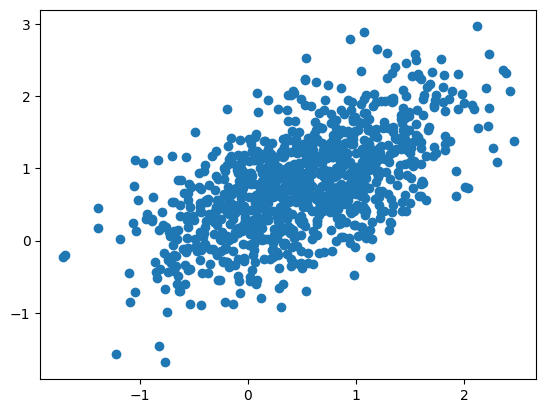

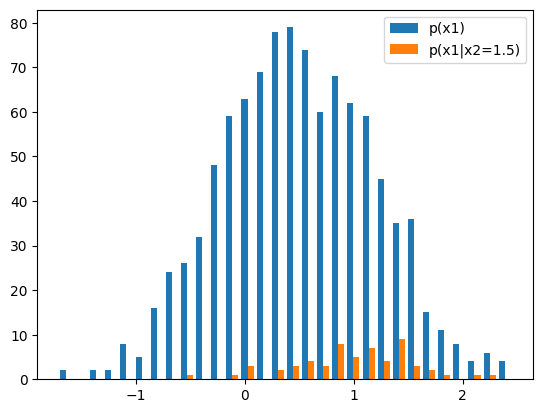

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

N = 1000
mean = [0.5, 0.8]
cov = [[0.5, 0.3], [0.3, 0.5]]
X = np.random.multivariate_normal(mean, cov, size=N, check_valid='warn', tol=1e-8)
x1 = X[:,0] 
x2 = X[:,1]
plt.scatter(x1, x2)
plt.show()

# puntos de x1 tales que x2= 1.5

x1_cond = [x for i,x in enumerate(x1) if 1.4<x2[i]<1.6 ]


plt.hist([x1, x1_cond], label = ['p(x1)', 'p(x1|x2=1.5)'], bins=30)
plt.legend()
plt.show()



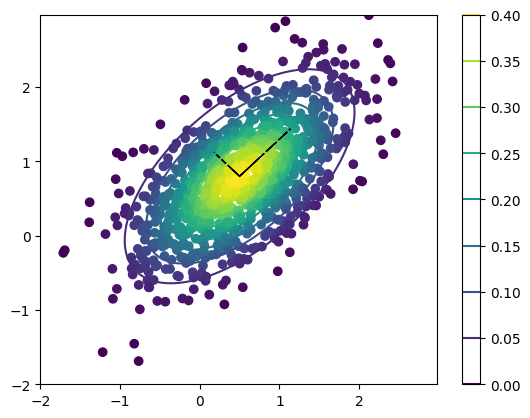

In [2]:
# valores y vectores propios
val_p, vec_p = np.linalg.eig(cov)

# Evaluamos los puntos para ponerle el colorcito a cada uno
y = multivariate_normal.pdf(X, mean, cov) 

# creamos la rejilla 
delta = 0.025
eje_x1 = np.arange(-2,3, delta)
eje_x2 = np.arange(-2,3, delta)
X_m, Y_m = np.meshgrid(eje_x1,eje_x2)

# aquí ponemos una lista de los puntps
M = np.c_[X_m.reshape(-1,1), Y_m.reshape(-1,1)]
Z = multivariate_normal.pdf(M, mean, cov) 

# gráfica
plt.scatter(x1, x2, c = y)
plt.contour(X_m, Y_m, Z.reshape(len(eje_x1), len(eje_x1)))
plt.colorbar()
plt.arrow(mean[0], mean[1], vec_p[0][0]*np.sqrt(val_p[0]), vec_p[1][0]*np.sqrt(val_p[0]))
plt.arrow(mean[0], mean[1], vec_p[0][1]*np.sqrt(val_p[1]), vec_p[1][1]*np.sqrt(val_p[1]))